In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten
##############
# Sequential -> (TensorFlow's Keras API to create a NN model as a sequence of layers.)a way to stack layers one after another.
# Conv2D -> (A layer in a CNN that applies 2D convolution operations)extracts edges or textures.
# MaxPooling2D -> (reduces height and width)reduces overfitting while keeping important features.
# Dense -> linear transformation and activation function to learn complex patterns.
# Flatten -> converts 2D or 3D to 1D

In [34]:
X_train = np.loadtxt('dog_cat_dataset/input.csv', delimiter=',') # training dataset
Y_train = np.loadtxt('dog_cat_dataset/labels.csv', delimiter=',') # output of training dataset

X_test = np.loadtxt('dog_cat_dataset/input_test.csv',delimiter=',') # values to be tested on
Y_test = np.loadtxt('dog_cat_dataset/labels_test.csv',delimiter=',') # results of tested on dataset

In [35]:
print("Shape of XTR : " ,X_train.shape)
print("Shape of YTR : " ,Y_train.shape)
print("Shape of XT : " ,X_test.shape)
print("Shape of YT : " ,Y_test.shape)

Shape of XTR :  (2000, 30000)
Shape of YTR :  (2000,)
Shape of XT :  (400, 30000)
Shape of YT :  (400,)


In [42]:
#reshaping the images to match with input format and for binary classification(X,Y_test)
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

# converting numbers into 0 & 1
X_train = X_train / 255.0
X_test =  X_test / 255.0

In [43]:
print("Shape of XTR : " ,X_train.shape)
print("Shape of YTR : " ,Y_train.shape)
print("Shape of XT : " ,X_test.shape)
print("Shape of YT : " ,Y_test.shape)

Shape of XTR :  (2000, 100, 100, 3)
Shape of YTR :  (2000, 1)
Shape of XT :  (400, 100, 100, 3)
Shape of YT :  (400, 1)


In [45]:
X_train[1,:] # priting to see converion to 0 & 1

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

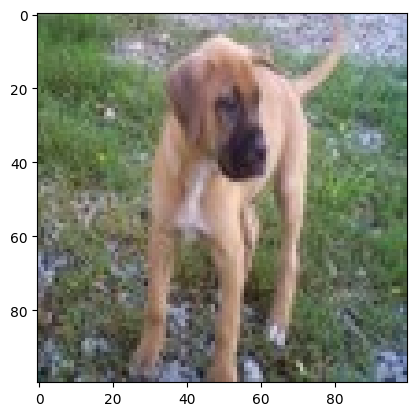

In [47]:
# randoming showing an image
import matplotlib.pyplot as mlt
import random

idx = random.randint(0,len(X_train))
mlt.imshow(X_train[idx,:])

<h2>Making the model</h2>

In [54]:
model = Sequential([
    # 1st layer
    # 32 no of filters
    Conv2D(32,(3,3),activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    # 2nd layer
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    # Connecting each neuron in the layer to every neuron in the previous layer
    Dense(64,activation='relu'), # for i/p layer 64 neurons
    Dense(1,activation='sigmoid')
])

<h2>Cost Function</h2>

In [60]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

# binary_crosstropy -> diff between predicted outputs and the actual target values 
# adam -> to minimize the loss during training
# accuracy -> tracking accurancy

In [62]:
model.fit(X_train,Y_train,epochs=6,batch_size=64)

Epoch 1/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7994 - loss: 0.4187
Epoch 2/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8188 - loss: 0.3911
Epoch 3/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8756 - loss: 0.2824
Epoch 4/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9285 - loss: 0.2095
Epoch 5/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9128 - loss: 0.2288
Epoch 6/6
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9556 - loss: 0.1229


In [63]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5744 - loss: 1.2632


[0.9881188273429871, 0.6524999737739563]

<h2>Prediction</h2>

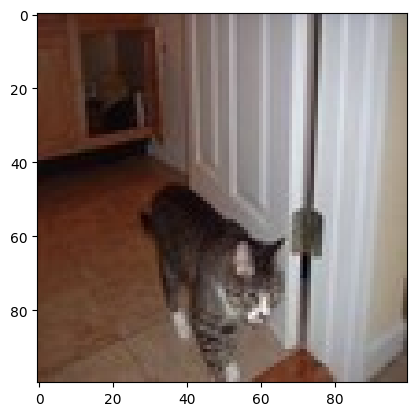

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The model says it is a :  cat


In [109]:
idx2 = random.randint(0,len(Y_test))
mlt.imshow(X_test[idx2,:])
mlt.show()
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
#print(y_pred)
y_pred = y_pred < 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("The model says it is a : ",pred)